In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-50-us-tech-companies-2022-2023-dataset/Top 50 US Tech Companies 2022 - 2023.csv


#  Import Dataset

In [30]:
df=pd.read_csv("/kaggle/input/top-50-us-tech-companies-2022-2023-dataset/Top 50 US Tech Companies 2022 - 2023.csv")

# 1. Data Preparation
  ****1.checking column data****

In [31]:
df.columns

Index(['Company Name', 'Industry', 'Sector', 'HQ State', 'Founding Year',
       'Annual Revenue 2022-2023 (USD in Billions)',
       'Market Cap (USD in Trillions)', 'Stock Name',
       'Annual Income Tax in 2022-2023 (USD in Billions)', 'Employee Size'],
      dtype='object')

****2. understanding Data****

In [32]:
df.head(10)

,Company Name,Industry,Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473
5,Tesla,Technology,Software Infrastructure,Texas,2003,81.46,0.625,TSLA,1.132,127855
6,Meta Platforms,Technology,Software Infrastructure,California,2004,116.60,0.524,META,5.619,86482
7,Broadcom Inc.,Technology,Semiconductors,California,1961,34.41,0.266,AVGO,0.939,20000
8,Oracle Corporation,Technology,Software Infrastructure,Texas,1977,46.07,0.236,ORCL,0.932,143000
9,Cisco Systems Inc.,Technology,Communication Equipments,California,1984,53.16,0.208,CSCO,2.665,83300


****3. Check for Missing Data****

In [33]:
df.isna().sum()

Company Name                                        0
Industry                                            0
Sector                                              0
HQ State                                            0
Founding Year                                       0
Annual Revenue 2022-2023 (USD in Billions)          0
Market Cap (USD in Trillions)                       0
Stock Name                                          0
Annual Income Tax in 2022-2023 (USD in Billions)    0
Employee Size                                       0
dtype: int64

****4. Check Data types of present column****

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Company Name                                      50 non-null     object 
 1   Industry                                          50 non-null     object 
 2   Sector                                            50 non-null     object 
 3   HQ State                                          50 non-null     object 
 4   Founding Year                                     50 non-null     int64  
 5   Annual Revenue 2022-2023 (USD in Billions)        50 non-null     float64
 6   Market Cap (USD in Trillions)                     50 non-null     float64
 7   Stock Name                                        50 non-null     object 
 8   Annual Income Tax in 2022-2023 (USD in Billions)  50 non-null     float64
 9   Employee Size          

****5.Details of Numeric Data****

In [35]:
df.describe()

,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
count,50.000000,50.00000,50.000000,50.000000,5.000000e+01
mean,1984.140000,51.20440,0.252160,1.386780,8.324962e+04
std,24.988985,97.41288,0.490377,3.687916,2.205869e+05
min,1890.000000,2.06000,0.028000,-3.217000,2.993000e+03
25%,1977.250000,7.65250,0.051250,0.098750,1.415000e+04
50%,1988.500000,17.66500,0.082500,0.280500,2.472500e+04
75%,1999.750000,40.81500,0.160250,0.945000,7.015575e+04
max,2012.000000,513.98000,2.520000,18.314000,1.541000e+06


****6. occurance of each value in each column****

In [36]:

data=['Industry', 'Sector', 'HQ State', 'Founding Year',
       'Annual Revenue 2022-2023 (USD in Billions)',
       'Market Cap (USD in Trillions)', 'Stock Name',
       'Annual Income Tax in 2022-2023 (USD in Billions)', 'Employee Size']
for column in data:
    print(df[column].value_counts())
    print(" ")

Industry
Technology    50
Name: count, dtype: int64
 
Sector
Software Application        15
Semiconductors              14
Software Infrastructure     12
IT Services                  3
Computer Hardware            3
Consumer Electronics         1
Communication Equipments     1
Electronic Components        1
Name: count, dtype: int64
 
HQ State
California        33
Texas              4
Washington         2
New York           2
Connecticut        1
Massachusetts      1
New Jersey         1
Wisconsin          1
Idaho              1
Montana            1
Florida            1
Arizona            1
North Carolina     1
Name: count, dtype: int64
 
Founding Year
1998    4
2009    3
2004    3
1984    3
1982    3
2008    2
1997    2
2005    2
1976    1
1986    1
1980    1
1978    1
1988    1
1965    1
2000    1
2012    1
1890    1
1989    1
1995    1
1949    1
1911    1
1996    1
1967    1
1975    1
1983    1
1968    1
1985    1
1969    1
1930    1
1999    1
1977    1
1961    1
2003    1
1993    1

# EDA & Data Visualization


****Top Company In State by Annual Revenue****

In [37]:
max_revenue = df.groupby('HQ State').apply(lambda x: x.loc[x['Annual Revenue 2022-2023 (USD in Billions)'].idxmax()]).reset_index(drop=True)
result=max_revenue[['Company Name', 'HQ State']]
print(result)

                 Company Name        HQ State
0   Microchip Technology Inc.         Arizona
1                  Apple Inc.      California
2            Booking Holdings     Connecticut
3          Roper Technologies         Florida
4           Micron Technology           Idaho
5         Analog Devices Inc.   Massachusetts
6              Snowflake Inc.         Montana
7   Automatic Data Processing      New Jersey
8             IBM Corporation        New York
9              IQVIA Holdings  North Carolina
10     Dell Technologies Inc.           Texas
11                     Amazon      Washington
12                Fiserv Inc.       Wisconsin


/tmp/ipykernel_33/151688048.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_revenue = df.groupby('HQ State').apply(lambda x: x.loc[x['Annual Revenue 2022-2023 (USD in Billions)'].idxmax()]).reset_index(drop=True)


***Insight: In Arizona Microchip Tech is Top company by revenue. simillarly in california Apple is big company etc***

# Univariate Analysis
1.Head quarter sates of company

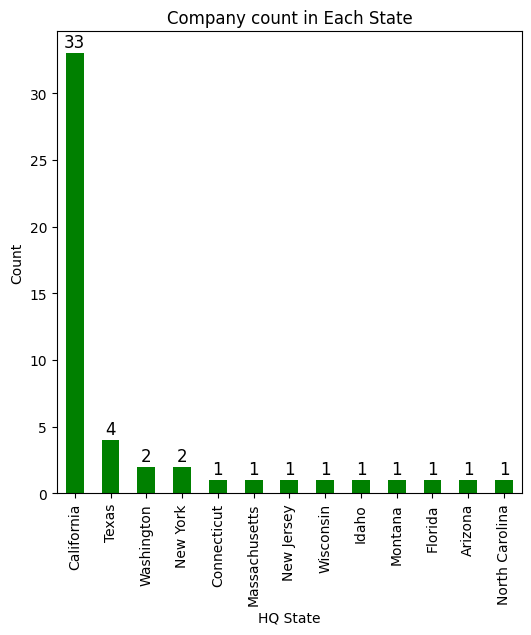

In [38]:
HQ_State_count=df['HQ State'].value_counts()
plt.figure(figsize=(6,6))
bars=HQ_State_count.plot(kind='bar',color='green')
plt.title("Company count in Each State")
plt.ylabel("Count")
# Add data labels
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', size=12, xytext=(0, 8),
                 textcoords='offset points')
plt.show()

***Insight:Most of the companies HQ_State is California after that  Texas***

2. Most Of the companies are work in which sector?

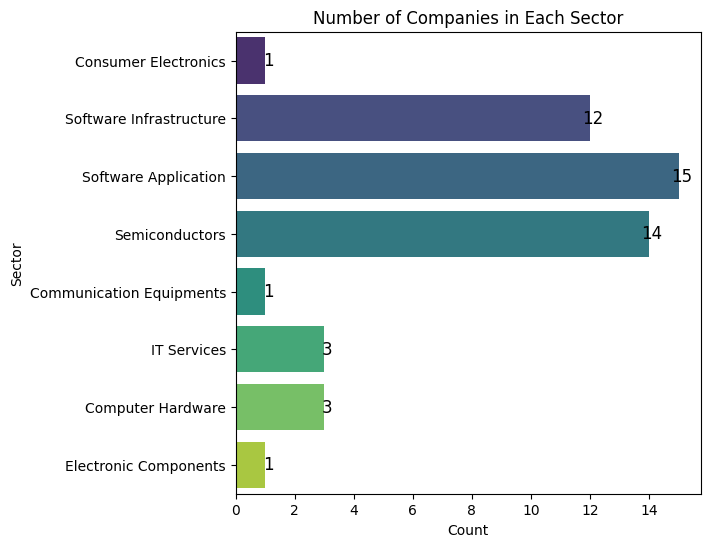

In [39]:
sector_count=df['Sector'].value_counts()
plt.figure(figsize=(6,6))
ax = sns.countplot(y='Sector', data=df, palette='viridis')
# Add data labels
for p in ax.patches:
    width = p.get_width()  # get bar length
    ax.text(width + 0.1,    # set the text at the end of the bar
            p.get_y() + p.get_height() / 2,  # set the text in the middle of the bar
            int(width),   # set the value
            ha='center', va='center', size=12)  # center align the text
plt.title('Number of Companies in Each Sector')
plt.xlabel('Count')
plt.ylabel('Sector')
plt.show()

***Insight: Most of the companies are work in software application sector after that in semiconductors,
Software Infrastructure and very few are work in Electronic Components***


# Bivariate Analysis

1. Top 10 companies by employee size

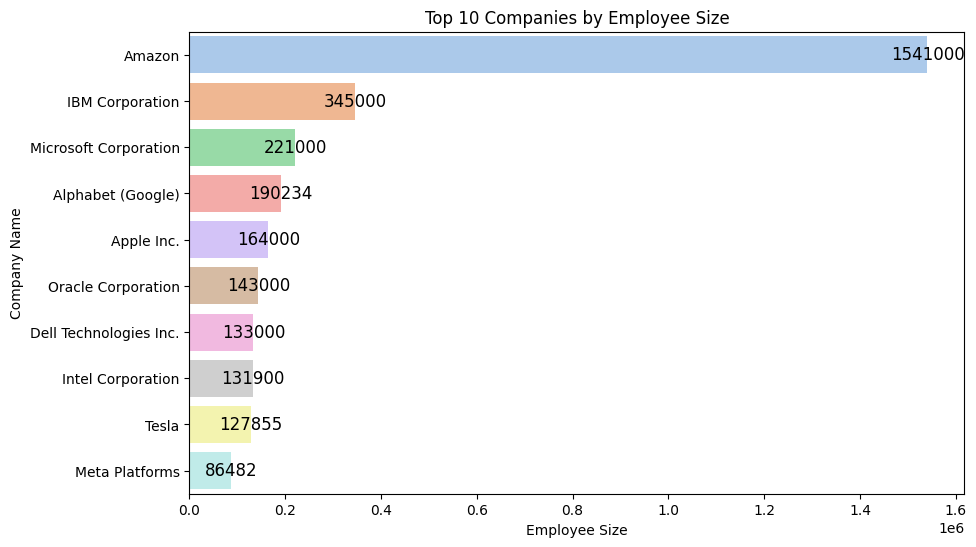

In [40]:
top10_companies_emp_size=df.sort_values(by='Employee Size',ascending=False).head(10)
plt.figure(figsize=(10,6))
ax=sns.barplot(x='Employee Size', y='Company Name', data= top10_companies_emp_size, palette='pastel')

for p in ax.patches:
    plt.text(p.get_width()+1000,p.get_y()+p.get_height()/2, int(p.get_width()),ha='center',va='center',size=12)
plt.title('Top 10 Companies by Employee Size')
plt.xlabel('Employee Size')
plt.ylabel('Company Name')
plt.show()


***Insight:Amazon has highest staf as compare to other  i.e 1541000 after that IBM and Microsoft***

2. Top 10 companies with their Annual Revenue

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


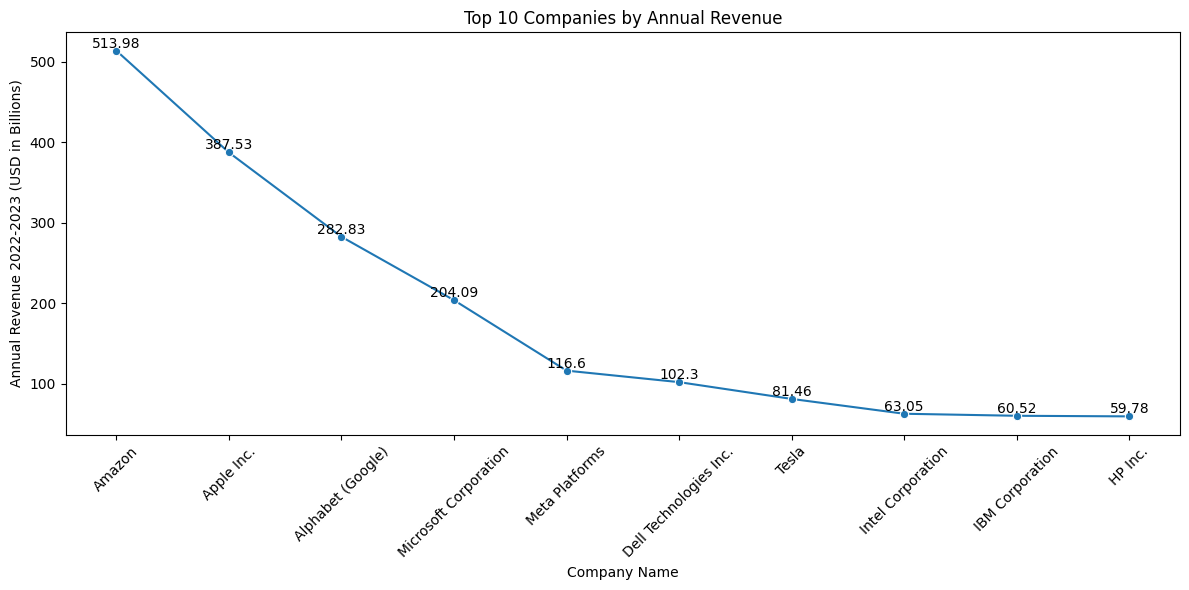

In [41]:
top_10_income= df.sort_values(by='Annual Revenue 2022-2023 (USD in Billions)',ascending=False).head(10)
top_10_income
plt.figure(figsize=(12, 6))
ax=sns.lineplot(data=top_10_income, x='Company Name', y='Annual Revenue 2022-2023 (USD in Billions)', marker='o')
plt.title('Top 10 Companies by Annual Revenue')
plt.xlabel('Company Name')
plt.ylabel('Annual Revenue 2022-2023 (USD in Billions)')
# Add data labels
for i, txt in enumerate(top_10_income['Annual Revenue 2022-2023 (USD in Billions)']):
    ax.text(i, txt, round(txt, 2), ha='center', va='bottom')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

***Insight: Amezon has Highest Income in 2022-2023 i.e 513.98 Billion $. after that Apple, Goggle and at 10th position  is HP***

3. Companies by Annual income tax

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


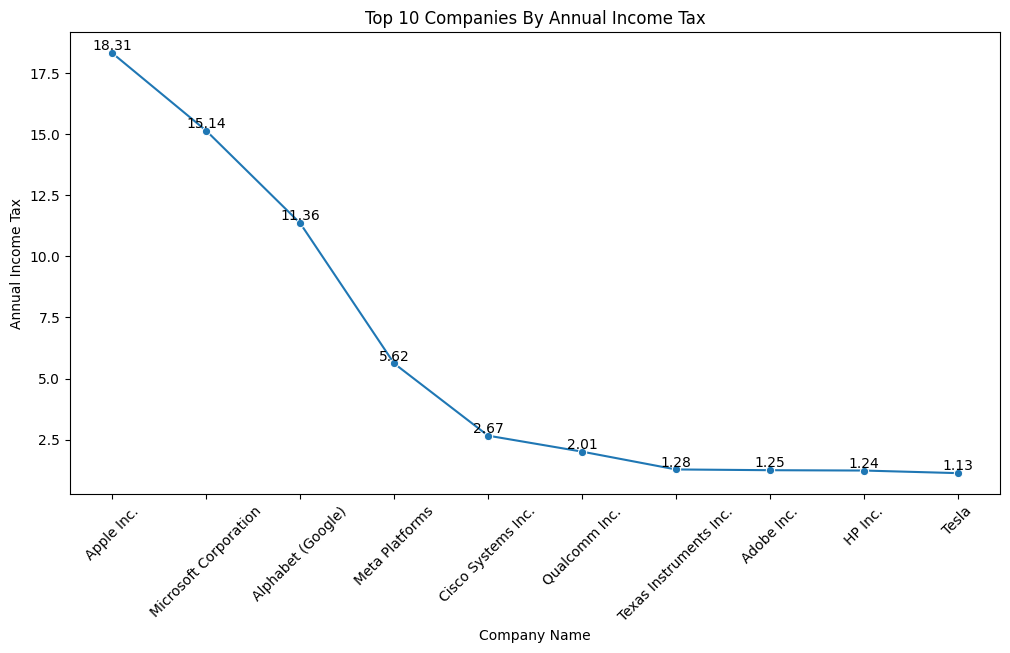

In [42]:
top_10_tax= df.sort_values('Annual Income Tax in 2022-2023 (USD in Billions)',ascending=False).head(10)
plt.figure(figsize=(12,6))
ax=sns.lineplot(data=top_10_tax,x='Company Name',y='Annual Income Tax in 2022-2023 (USD in Billions)',marker='o')
plt.title('Top 10 Companies By Annual Income Tax')
plt.xlabel("Company Name")
plt.ylabel('Annual Income Tax')
plt.xticks(rotation=45)
# Add data labels
for i, txt in enumerate(top_10_tax['Annual Income Tax in 2022-2023 (USD in Billions)']):
    ax.text(i, txt, round(txt, 2), ha='center', va='bottom')
plt.show()

*** Insight: Apple's income tax is max for 2022-23 i.e 18.31 bn$ as compare to other and leat for Tesla***

3. Top 10 Companies by Market cap

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


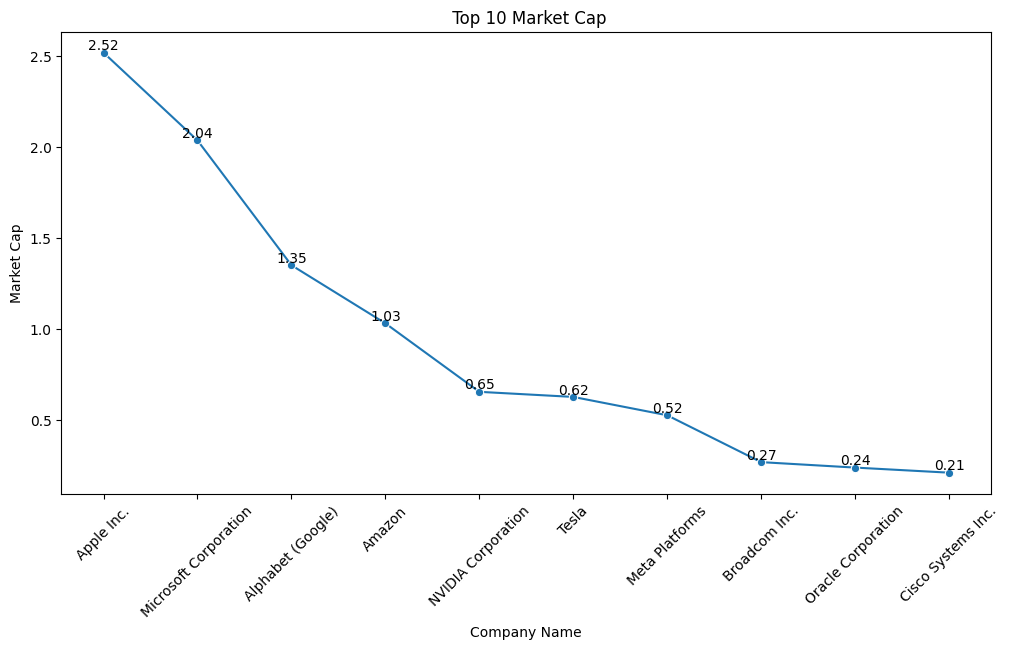

In [43]:
top_10_market_cap= df.sort_values('Market Cap (USD in Trillions)',ascending=False).head(10)
plt.figure(figsize=(12,6))
ax=sns.lineplot(data=top_10_market_cap,x='Company Name',y='Market Cap (USD in Trillions)',marker='o')
plt.title(' Top 10 Market Cap')
plt.xlabel("Company Name")
plt.ylabel('Market Cap')
plt.xticks(rotation=45)
# Add data labels
for i, txt in enumerate(top_10_market_cap['Market Cap (USD in Trillions)']):
    ax.text(i, txt, round(txt, 2), ha='center', va='bottom')
plt.show()

***Insight: Market cap of Apple is max i.e 2.52 Tn$ after that Microsoft, Google and at last Cisco.***

4. Correlation between Annual revenue and Annual tax

Correlation coefficient: 0.545948639233132


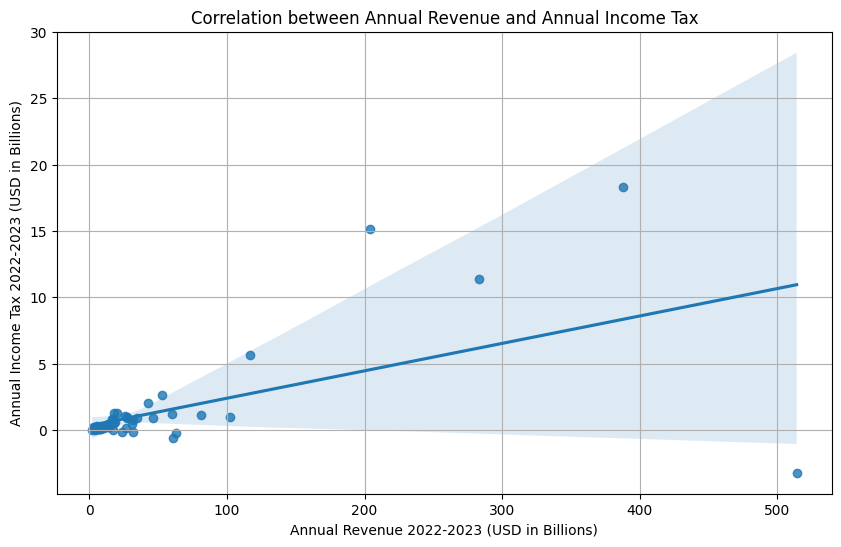

In [44]:
# Calculate the correlation coefficient
correlation = df['Annual Revenue 2022-2023 (USD in Billions)'].corr(df['Annual Income Tax in 2022-2023 (USD in Billions)'])
print(f"Correlation coefficient: {correlation}")
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
ax = sns.regplot(x='Annual Revenue 2022-2023 (USD in Billions)', y='Annual Income Tax in 2022-2023 (USD in Billions)', data=df)
plt.title('Correlation between Annual Revenue and Annual Income Tax')
plt.xlabel('Annual Revenue 2022-2023 (USD in Billions)')
plt.ylabel('Annual Income Tax 2022-2023 (USD in Billions)')
plt.grid(True)
plt.show()


***Insight: Here we can see that if Income increases  then Tax is also increases***